In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def file_cleaner_(data_intput, data_output, file_name):
    '''Reads in SF speed data and formats them into proper csv files'''
    
    with open(data_intput + file_name, 'r') as old_file:
        with open(data_output + file_name, 'w') as new_file:
            first = 0 
            for line in old_file.readlines():
                # If it is the first line, separate the header from the data
                if first == 0: 
                    line = re.sub(r'\t|\n|\s+', '', line)
                    header = re.findall(r'[A-Z+?\_?]+', line)
                    data = re.findall(r'[\-?\d+?\/?\.?\:?]+|\,(?=\,)', line)
                    
                    # Date and time are connected 
                    date = re.search(r'(\d{2}\/){2}\d{4}', data[1]).group(0)
                    time = re.search(r'(\d{2}\:){2}\d{2}', data[1]).group(0)
                    date = date + ' ' + time 
                    
                    # Remove the merged date and time
                    data.remove(data[1])
                    
                    # Insert separated date and time
                    data.insert(1, date)
                    
                    data = [x if x != ',' else '' for x in data]
                    header = (',').join(header)
                    data = (',').join(data)
                    new_file.write(header + '\n')
                    new_file.write(data + '\n')
                    first += 1 
                else:
                    if line != '\n':
                        line = line.rstrip()
                        new_file.write(line + '\n')

In [ ]:
def read_file(dir_name, file_name, output):

In [ ]:
def write_file(dir_name, file_name, data):
    with open(dir_name + file_name, 'w') as new_file:
    

In [ ]:
def mapping_function(traffic)
    # Convert pandas to geopandas
    geom = traffic.apply(lambda x: Point(x['LONGITUDE'], x['LATITUDE']), axis=1)
    traffic = gpd.GeoDataFrame(traffic, geometry=geom)
    # traffic.crs = {'init': 'epsg:4326'}
    print('Size of travel speed data: {}'.format(traffic.shape))
#     traffic.head()

    # Join with census data
    # 'op' - operation | specify 'within' because we want our zip ponts 
    # that are within state polygons. 
    sf_census_zones.crs = traffic.crs
    mapped_traffic = gpd.sjoin(traffic, sf_census_zones, op='within')
#     mapped_traffic.head()
    return mapped_traffic

In [ ]:
def main():
    data = read_file()
    mapped_data = mapping_function(data)
    write_file()

In [3]:
sfmta = pd.read_csv('../raw_data/sf_speed_data/sfmtaAVLRawData01012013.csv')
sfmta.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,REV,REPORT_TIME,VEHICLE_TAG,LONGITUDE,LATITUDE,SPEED,HEADING,TRAIN_ASSIGNMENT,PREDICTABLE
0,1447,01/01/2013 00:00:53,3,-122.41201,37.79478,1.389,107.0,5901,1
1,1447,01/01/2013 00:02:23,3,-122.41201,37.79478,1.389,107.0,5901,1
2,1447,01/01/2013 00:03:53,3,-122.41201,37.79478,1.389,107.0,5901,0
3,1447,01/01/2013 00:05:23,3,-122.41201,37.79478,1.389,107.0,5901,0
4,1447,01/01/2013 00:06:53,3,-122.41201,37.79478,1.389,107.0,5901,0


In [15]:
sfmta.REPORT_TIME.iloc[0].day

1

In [9]:
sfmta['REPORT_TIME'] = pd.to_datetime(sfmta['REPORT_TIME'])#.dt.tz_convert('US/Eastern') 

In [24]:
sfmta.head()

,REV,REPORT_TIME,VEHICLE_TAG,LONGITUDE,LATITUDE,SPEED,HEADING,TRAIN_ASSIGNMENT,PREDICTABLE,hour
REPORT_TIME,,,,,,,,,,
2013-01-01 00:00:53,1447,2013-01-01 00:00:53,3,-122.41201,37.79478,1.389,107.0,5901,1,0
2013-01-01 00:02:23,1447,2013-01-01 00:02:23,3,-122.41201,37.79478,1.389,107.0,5901,1,0
2013-01-01 00:03:53,1447,2013-01-01 00:03:53,3,-122.41201,37.79478,1.389,107.0,5901,0,0
2013-01-01 00:05:23,1447,2013-01-01 00:05:23,3,-122.41201,37.79478,1.389,107.0,5901,0,0
2013-01-01 00:06:53,1447,2013-01-01 00:06:53,3,-122.41201,37.79478,1.389,107.0,5901,0,0


In [23]:
sfmta = sfmta.set_index(sfmta['REPORT_TIME'])
sfmta['hour'] = sfmta.index.hour

In [25]:
df_group = sfmta.groupby(sfmta.index.hour).mean()

In [32]:
df_group

,REV,LONGITUDE,LATITUDE,SPEED,HEADING,PREDICTABLE,hour
REPORT_TIME,,,,,,,
0,1447.0,-122.427487,37.764989,4.299093,174.724215,0.584818,0.0
1,1447.0,-122.423401,37.766239,4.082225,170.671345,0.479696,1.0
2,1447.0,-122.424288,37.763841,3.218809,177.860674,0.384033,2.0
3,1447.0,-122.357852,37.750002,3.352645,178.897051,0.400680,3.0
4,1447.0,-122.376059,37.752991,3.393754,170.729659,0.294508,4.0
5,1447.0,-122.425691,37.764554,4.778424,182.568531,0.360192,5.0
6,1447.0,-122.426587,37.761948,4.745082,187.013964,0.550745,6.0
7,1447.0,-122.428320,37.763379,4.925251,187.309790,0.669403,7.0
8,1447.0,-122.428329,37.764223,4.808856,181.425830,0.719602,8.0


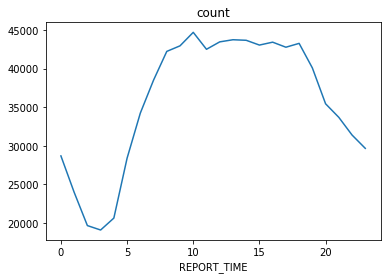

In [36]:
sfmta.groupby(sfmta.index.hour).count().SPEED.plot(title='count')

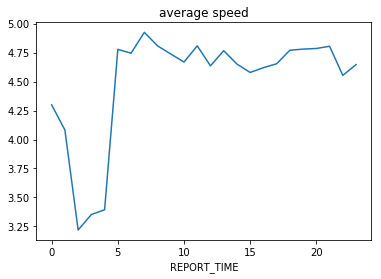

In [37]:
df_group.SPEED.plot(title = 'average speed in 24 hours')

In [38]:
sfmta.isna().any()

REV                 False
REPORT_TIME         False
VEHICLE_TAG         False
LONGITUDE           False
LATITUDE            False
SPEED               False
HEADING             False
TRAIN_ASSIGNMENT     True
PREDICTABLE         False
hour                False
dtype: bool